### Overview

-  k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster

Brief steps on how it works:

- ****Choose the number of clusters**** that is to be found from the data (say k clusters )
- Choose k points ****randomly**** (not necessarily belongs to points on datasets) , lets assume these are each centroid of k clusters
- Assign each remaining data to its closest centroid which froms k clusters now
- *Now compute the actual centroid (ie not assumed as in beginning) from each cluster which froms new centroids of each cluster
- Continue reassigning data to closest new centroid 
  If any reassignment of data takes place repeat step * 
  else stop 
  


![wiki image](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/124px-K_Means_Example_Step_1.svg.png)
**1) k initial "means" (in this case k=3) are randomly generated within the data domain (shown in color).**

![wiki image](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/139px-K_Means_Example_Step_2.svg.png)
**2) k clusters are created by associating every observation with the nearest mean. The partitions here represent the Voronoi diagram generated by the means.**

![wiki image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/139px-K_Means_Example_Step_3.svg.png)
**3) The centroid of each of the k clusters becomes the new mean.**

![wiki image](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/139px-K_Means_Example_Step_4.svg.png)
**4. Steps 2 and 3 are repeated until convergence has been reached.**


![wiki image](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/220px-K-means_convergence.gif)
*Convergence of k-means*


#### Random initialization trap & Solution

-  Random initialization trap is a problem that degrades the clutering result due to random points initialized in the beginning.
- Solution: K-means ++(before using k means)
  The exact algorithm is as follows:
    - Choose one center uniformly at random from among the data points.
    - For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen.
    - Choose one new data point at random as a new center, using a weighted probability distribution where a point x is  chosen       with probability proportional to D(x)2.
    - Repeat Steps 2 and 3 until k centers have been chosen.
    - Now that the initial centers have been chosen, proceed using standard k-means clustering.
    
#### Selecting number of clusters

- Use of WCSS(within-cluster sum of squares) metric , lesser its value for given number of cluster more accurate is selection of clusters

    Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:
    ![wiki image](https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922)
    where μi is the mean of points in Si. 
    This is equivalent to minimizing the pairwise squared deviations of points in the same cluster:
    ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/9fb2388a00fcf4f1df3117883fccd0c4028da33d)
    ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/009145430778f69c28e5852d434f0d07e5ca896d)
    

![](https://3.bp.blogspot.com/-Cvqq-a3rplI/WWT_n0jeOJI/AAAAAAAAB5Q/vY_RLl_-bDYPGkn26Bs02JWgxd3285KDQCLcBGAs/s640/Capture13.PNG)
![](https://2.bp.blogspot.com/-9I7CwXwd2aI/WWUA8MwpE1I/AAAAAAAAB5c/r8ECa0aV2nMbw10OcxtqN2Hz4xLyQWD6wCLcBGAs/s640/Capture14.PNG)

From above fig what will happen if we keep on increasing the number of clusters and reached to same number of points in dataset?=> clearly WCSS=0. 
So to choose right number of clusters we can use elbow method where you keep increasing number of clusters and correspondingly check for WCSS. Wherever you find substantial reduce (ie from elbow) that will be the optimum number of clusters for your problem. During choosing the clusters make careful observations and checks.

![](https://3.bp.blogspot.com/-wAsNTyZ5rfg/WWUDTs0g9aI/AAAAAAAAB5s/Ain9V_E9yDIrvNTB6JALkZ0EmqDu6nSigCLcBGAs/s400/Capture17.PNG)




## Implenentation using libraries:
Libraries Doc Links:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

https://scikit-learn.org/stable/modules/clustering.html#

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
   
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.ListedColormap.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html

https://matplotlib.org/3.1.1/api/colors_api.html

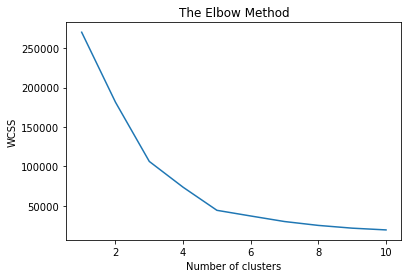

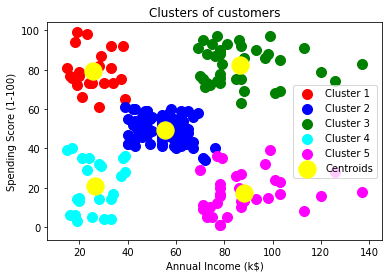

In [2]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #note k-means ++ approach is used see docs
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  #note here kmeans.inertia_ calculates wcss 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#from elbow graph we can see that we can observe lower elbow at 5

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()